In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid') 

In [126]:
car_data = pd.read_csv("data/vehicles.csv")
car_data.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [127]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

<Axes: >

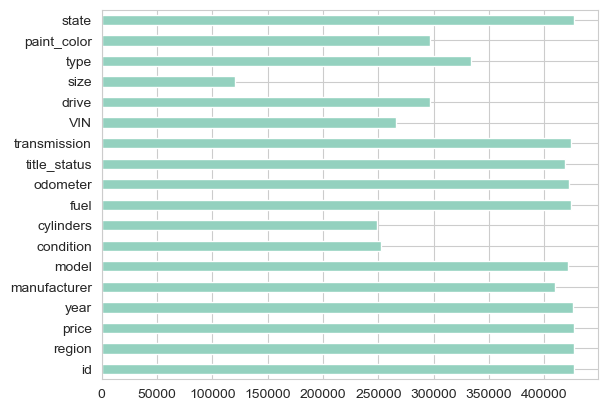

In [128]:
car_data.count().plot(kind ='barh')


In [129]:
car_data1 = car_data.drop(labels='size', axis=1)

In [130]:
car_data1.dropna(subset=["VIN"], inplace=True)
#car_data2= car_data1.dropna()

In [131]:
car_data1.dropna(subset=["condition"], inplace=True)

In [132]:
car_data3=car_data1.drop(labels=['id', 'region','paint_color','state', 'VIN'], axis=1)

In [133]:
#car_data3['cylinders'].value_counts()
car_data3['cylinders'].fillna(value='other', inplace=True)

In [134]:
car_data3['drive'].unique()

array([nan, '4wd', 'rwd', 'fwd'], dtype=object)

In [135]:
car_data3.dropna(subset=["drive"], inplace=True)

In [136]:
car_data3.dropna(subset=["type"], inplace=True)

In [137]:
car_data3['title_status'].unique()
car_data3['title_status'].fillna(value='other', inplace=True)
car_data3['manufacturer'].fillna(value='other', inplace=True)


<Axes: >

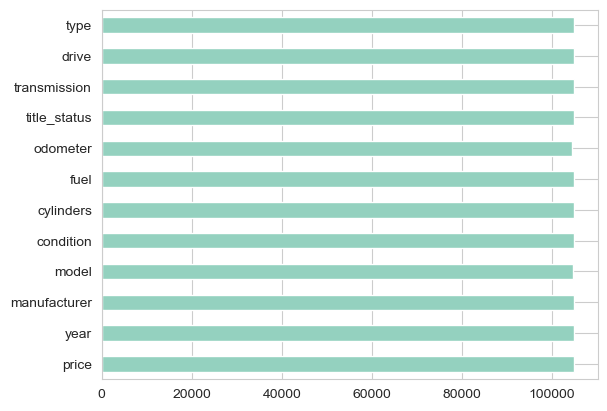

In [138]:
car_data3.dropna(subset=["type"], inplace=True)
#car_data2= car_data1.dropna()
car_data3.count().plot(kind ='barh')

Text(0.5, 1.0, 'Car Price Distribution Plot')

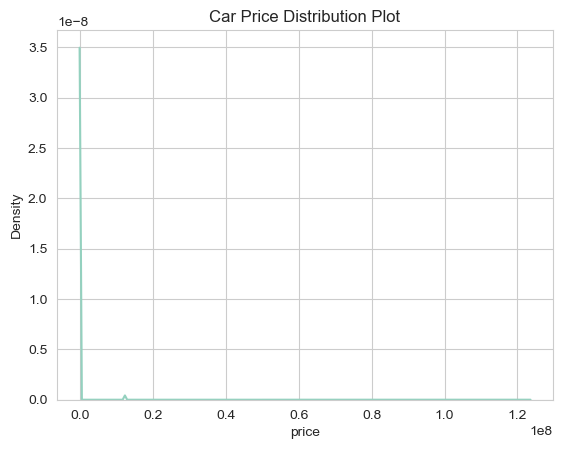

In [139]:
sns.kdeplot(data=car_data3, x="price")
plt.title('Car Price Distribution Plot')
# as we can see there's outliers and the data seem toconcentrated around 0 

<Axes: xlabel='price'>

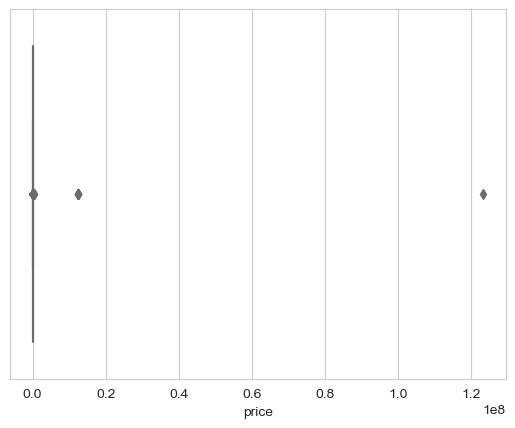

In [140]:
sns.boxplot(data = car_data3, x = 'price')

In [141]:
car_data3= car_data3.dropna()
car_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104281 entries, 32 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         104281 non-null  int64  
 1   year          104281 non-null  float64
 2   manufacturer  104281 non-null  object 
 3   model         104281 non-null  object 
 4   condition     104281 non-null  object 
 5   cylinders     104281 non-null  object 
 6   fuel          104281 non-null  object 
 7   odometer      104281 non-null  float64
 8   title_status  104281 non-null  object 
 9   transmission  104281 non-null  object 
 10  drive         104281 non-null  object 
 11  type          104281 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.3+ MB


In [142]:
cols = ['year', 'odometer']
car_data3[cols] = car_data3[cols].applymap(np.int64)
car_data3.describe()

,price,year,odometer
count,1.042810e+05,104281.000000,1.042810e+05
mean,2.123856e+04,2013.417842,7.802805e+04
std,3.824832e+05,6.263768,9.348250e+04
min,0.000000e+00,1905.000000,0.000000e+00
25%,9.377000e+03,2011.000000,2.818500e+04
50%,1.799800e+04,2015.000000,6.708500e+04
75%,2.899900e+04,2017.000000,1.160000e+05
max,1.234568e+08,2022.000000,1.000000e+07


In [143]:
### Based on the box plot, we need to remove outliers for price and odometer. Will keep year as is

In [144]:
list_of_input_features_for_outliers = ['price','odometer']

def findLimit(col):
    q1= car_data3[col].quantile(.25)
    q3=car_data3[col].quantile(.75)
    iqr= q3-q1
    lower= q1 - (1.5 *iqr)
    upper = q3 + (1.5 *iqr)
    return lower, upper

def outlier(col):
    lowLimit, upLimit = findLimit(col)
    print(col + str(lowLimit) + " to " + str(upLimit))
    car_data3[col] = np.where(car_data3[col]< lowLimit,lowLimit,car_data3[col])
    car_data3[col] = np.where(car_data3[col]> upLimit,upLimit,car_data3[col])
    
    
for col in list_of_input_features_for_outliers:
    outlier(col)

price-20056.0 to 58432.0
odometer-103537.5 to 247722.5


Text(0.5, 1.0, 'Car Price Distribution Plot')

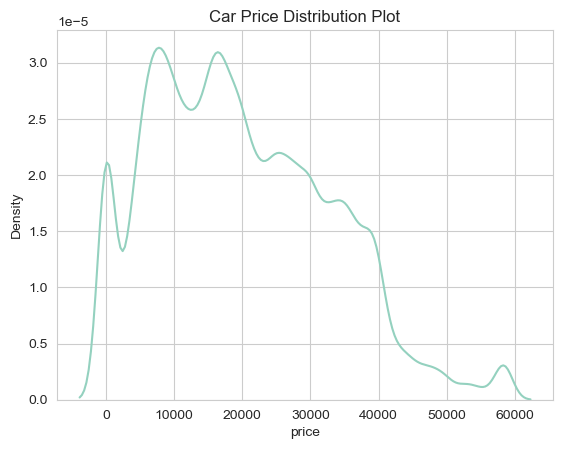

In [145]:
sns.kdeplot(data=car_data3, x="price")
plt.title('Car Price Distribution Plot')
# as we can see there's outliers are removed in price

<Axes: xlabel='price'>

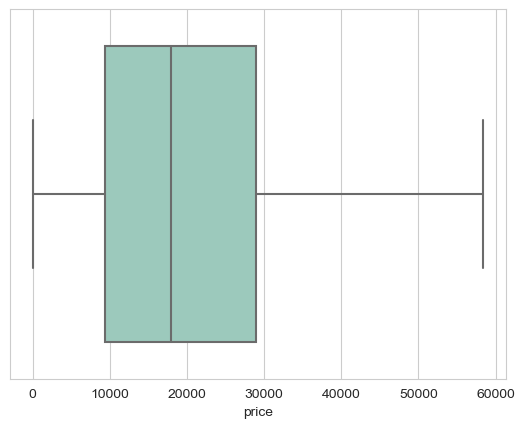

In [146]:
### Now, let's run box plot on price again and this looks much better
sns.boxplot(data = car_data3, x = 'price')

In [147]:
### Next step is to figure out what features we want to keep for regression and categoy vlaues
car_data3['fuel'].unique()

array(['gas', 'other', 'hybrid', 'diesel', 'electric'], dtype=object)

In [148]:
car_data3['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'lien', 'other', 'missing',
       'parts only'], dtype=object)

In [149]:
car_data3['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [150]:
car_data3['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [151]:
car_data3['condition'].unique()

array(['good', 'like new', 'excellent', 'fair', 'new', 'salvage'],
      dtype=object)

In [152]:
car_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104281 entries, 32 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         104281 non-null  float64
 1   year          104281 non-null  int64  
 2   manufacturer  104281 non-null  object 
 3   model         104281 non-null  object 
 4   condition     104281 non-null  object 
 5   cylinders     104281 non-null  object 
 6   fuel          104281 non-null  object 
 7   odometer      104281 non-null  float64
 8   title_status  104281 non-null  object 
 9   transmission  104281 non-null  object 
 10  drive         104281 non-null  object 
 11  type          104281 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 10.3+ MB


In [153]:
dummies = pd.get_dummies(car_data3.condition,prefix='Cond')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['condition'], axis='columns')


In [154]:
dummies = pd.get_dummies(car_data3.title_status, prefix='title')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['title_status'], axis='columns')

In [155]:
dummies = pd.get_dummies(car_data3.cylinders,prefix='Cyl')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['cylinders'], axis='columns')

In [156]:

dummies = pd.get_dummies(car_data3.drive,prefix='drive')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['drive'], axis='columns')

In [157]:
dummies = pd.get_dummies(car_data3.transmission,prefix='trans')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['transmission'], axis='columns')

In [158]:
dummies = pd.get_dummies(car_data3.fuel,prefix='fuel')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
car_data3=car_data3.drop(['fuel'], axis='columns')

In [159]:
dummies = pd.get_dummies(car_data3.type,prefix='type')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_clean = pd.concat([car_data3, dummies], axis='columns')
car_clean=car_clean.drop(['type'], axis='columns')

In [160]:
car_clean.replace({False: 0, True: 1}, inplace=True)

In [161]:
car_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104281 entries, 32 to 426879
Data columns (total 50 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             104281 non-null  float64
 1   year              104281 non-null  int64  
 2   manufacturer      104281 non-null  object 
 3   model             104281 non-null  object 
 4   odometer          104281 non-null  float64
 5   Cond_excellent    104281 non-null  int64  
 6   Cond_fair         104281 non-null  int64  
 7   Cond_good         104281 non-null  int64  
 8   Cond_like new     104281 non-null  int64  
 9   Cond_new          104281 non-null  int64  
 10  Cond_salvage      104281 non-null  int64  
 11  title_clean       104281 non-null  int64  
 12  title_lien        104281 non-null  int64  
 13  title_missing     104281 non-null  int64  
 14  title_other       104281 non-null  int64  
 15  title_parts only  104281 non-null  int64  
 16  title_rebuilt     104281

<Axes: xlabel='year'>

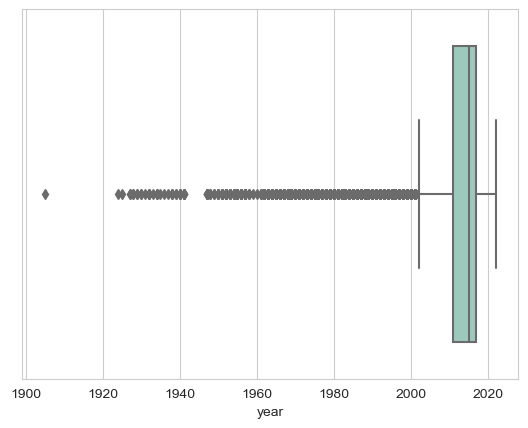

In [163]:
sns.boxplot(data = car_clean, x = 'year')

In [164]:
### As you can see we still have outliers in Year. let's remove any data before 1995 
Car_cleanFinal= car_clean[car_clean["year"] > 2002]

<Axes: xlabel='year'>

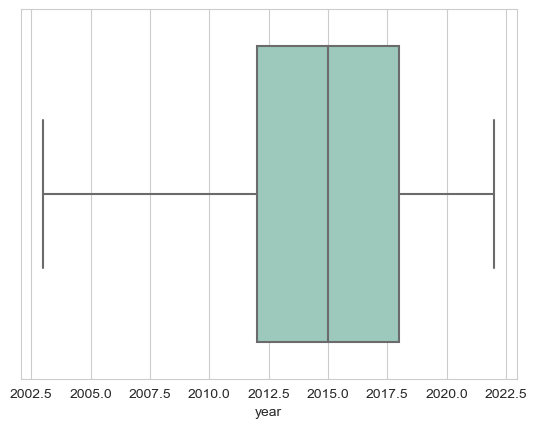

In [165]:
sns.boxplot(data = Car_cleanFinal, x = 'year')

In [166]:
from sklearn.preprocessing import LabelEncoder
temp_data = Car_cleanFinal.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['price'])).sort_values(ascending=False)[1:])



--Correated Features with target variable--

odometer            0.501800
year                0.497975
trans_other         0.413729
trans_automatic     0.381101
Cyl_4 cylinders     0.346049
drive_fwd           0.320430
Cond_excellent      0.299612
Cond_good           0.298148
type_pickup         0.255464
Cyl_8 cylinders     0.233088
fuel_gas            0.225181
type_sedan          0.202864
fuel_diesel         0.200129
drive_rwd           0.199492
type_other          0.167430
drive_4wd           0.148561
fuel_other          0.147109
type_coupe          0.117836
type_SUV            0.117738
type_truck          0.111237
type_wagon          0.104876
type_hatchback      0.097805
type_mini-van       0.089927
title_clean         0.089763
Cyl_other           0.085748
title_other         0.078852
Cond_fair           0.071862
trans_manual        0.071582
Cyl_5 cylinders     0.054432
manufacturer        0.050228
fuel_hybrid         0.044430
fuel_electric       0.041033
Cyl_12 cylinders    0.0378

<Axes: >

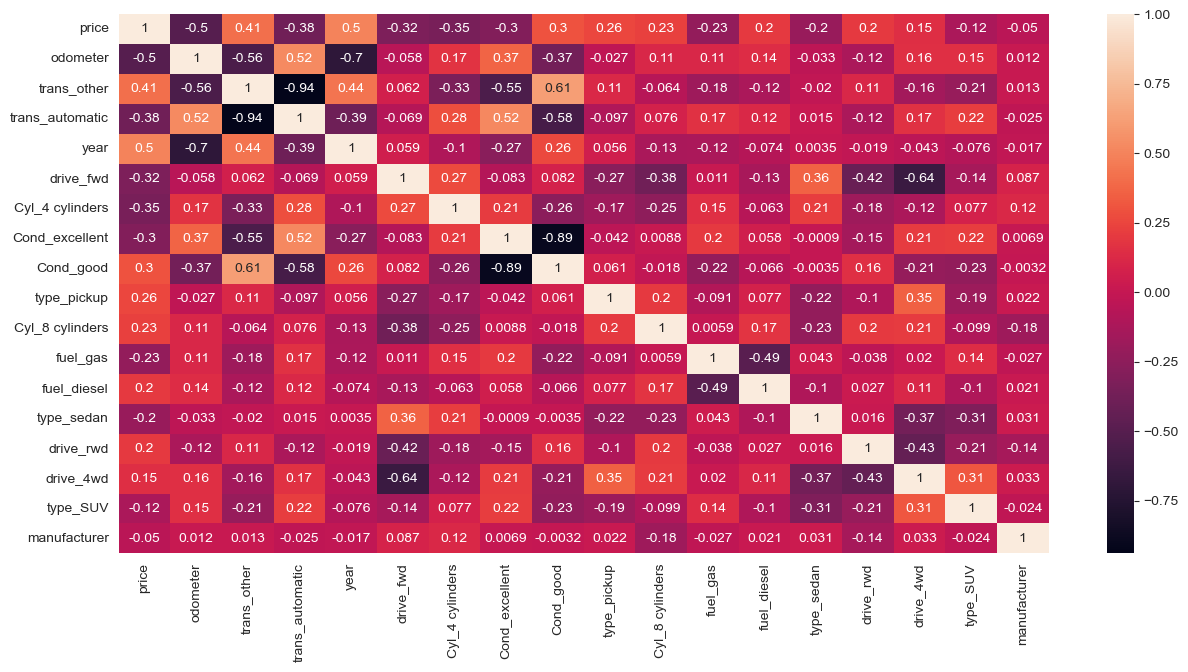

In [169]:
plt.figure(figsize=[15,7])
sns.heatmap(temp_data[['price','odometer','trans_other','trans_automatic','year','drive_fwd','Cyl_4 cylinders','Cond_excellent','Cond_good','type_pickup','Cyl_8 cylinders','fuel_gas','fuel_diesel','type_sedan','drive_rwd','drive_4wd','type_SUV','manufacturer']].corr( ), annot=True)

In [170]:
y=temp_data['price']

In [171]:
Xfinal= temp_data.drop(['price'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(Xfinal, y, random_state = 42)

In [172]:
print(Xfinal.shape,y.shape)

(100211, 49) (100211,)


In [173]:
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from sklearn.pipeline import Pipeline
set_config(display="diagram")

# Perform Ridge Regression

ridge_param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 71505472.64577396
Test MSE: 70839447.42526068


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [174]:
r2_score(y_train, ridge_train_preds)

0.5669909623453804

Feature: 0, Score: 28925626.44843
Feature: 1, Score: 70425.10319
Feature: 2, Score: 40339.77311
Feature: 3, Score: 20422392.94831
Feature: 4, Score: 348434.45476
Feature: 5, Score: 48267.53330
Feature: 6, Score: 200489.64261
Feature: 7, Score: 132292.05618
Feature: 8, Score: 4665.46830
Feature: 9, Score: 14369.94649
Feature: 10, Score: 484448.35221
Feature: 11, Score: 87736.87349
Feature: 12, Score: -25.71833
Feature: 13, Score: 1013551.74260
Feature: 14, Score: -51.49982
Feature: 15, Score: 3717.09291
Feature: 16, Score: 8344.43481
Feature: 17, Score: 173889.74454
Feature: 18, Score: 443099.91350
Feature: 19, Score: 120545.64778
Feature: 20, Score: 2463838.94103
Feature: 21, Score: 8556.63516
Feature: 22, Score: 132894.87445
Feature: 23, Score: 4211042.26784
Feature: 24, Score: 478678.62770
Feature: 25, Score: 1091077.26794
Feature: 26, Score: 4564753.76934
Feature: 27, Score: 1593110.38278
Feature: 28, Score: 1326366.23440
Feature: 29, Score: 1347.61556
Feature: 30, Score: 1346894.93

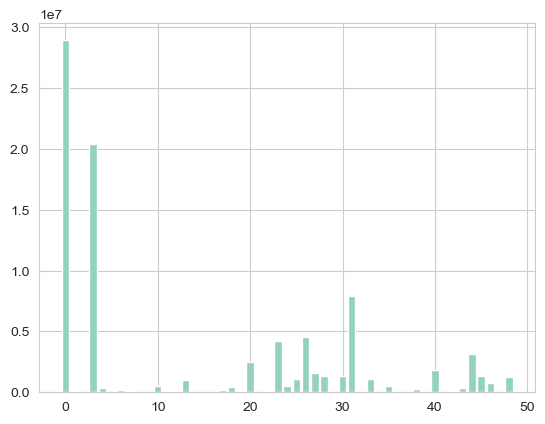

In [175]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

results = permutation_importance(ridge_grid, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

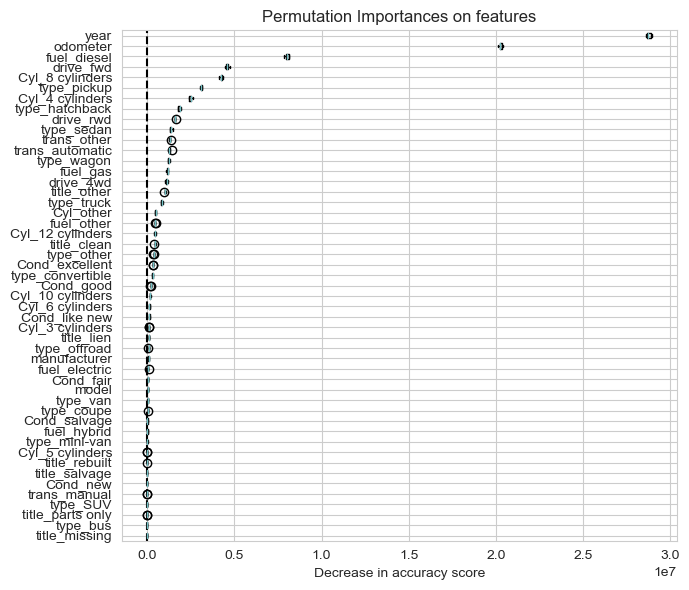

In [176]:
def plot_permutation_importance(clf, X, y, ax):
    results = permutation_importance(clf, X, y, scoring='neg_mean_squared_error')
    perm_sorted_idx = results.importances_mean.argsort()

    ax.boxplot(
        results.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(ridge_grid, X_train, y_train, ax)
ax.set_title("Permutation Importances on features")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

In [177]:
for i in results.importances_mean.argsort()[::-1]:
...     if results.importances_mean[i] - 2 * results.importances_std[i] > 0:
...         print(f"{Xfinal.columns[i]:<11}"
...               f"   {results.importances_mean[i]:.3f}"
...               f" +/- {results.importances_std[i]:.3f}")

year          28925626.448 +/- 95360.817
odometer      20422392.948 +/- 100869.971
fuel_diesel   7881470.185 +/- 126795.628
drive_fwd     4564753.769 +/- 30958.129
Cyl_8 cylinders   4211042.268 +/- 73159.007
type_pickup   3109485.527 +/- 89266.801
Cyl_4 cylinders   2463838.941 +/- 52100.283
type_hatchback   1845394.164 +/- 56466.204
drive_rwd     1593110.383 +/- 22194.302
trans_other   1346894.936 +/- 8238.988
type_sedan    1330432.965 +/- 40538.539
trans_automatic   1326366.234 +/- 7346.056
type_wagon    1279253.484 +/- 9137.600
fuel_gas      1106408.302 +/- 8154.233
drive_4wd     1091077.268 +/- 21649.632
title_other   1013551.743 +/- 41915.121
type_truck    790890.633 +/- 23867.321
title_clean   484448.352 +/- 31154.122
fuel_other    481461.804 +/- 15904.743
Cyl_other     478678.628 +/- 18956.975
Cyl_12 cylinders   443099.914 +/- 31254.507
type_other    380707.484 +/- 17616.322
Cond_excellent   348434.455 +/- 16100.769
type_convertible   300628.680 +/- 21165.598
Cond_good     200489

In [178]:
### Now Linear regression
from sklearn.linear_model import LinearRegression
model_list = []

model =LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

model_test_mse = mean_squared_error(y_test, y_test_pred)
model_train_mse = mean_squared_error(y_train, y_train_pred)
model_list.append({'LinearRegression deg 3 =':model_test_mse})
print("Train MSE : " + str(model_train_mse))
print("Test MSE : " + str(model_test_mse))

#Ridge MSE
#Train MSE: 71505472.64577396
#Test MSE: 70839447.42526068

Train MSE : 71505416.58055528
Test MSE : 70837530.95388861


In [179]:
r2_score(y_test, y_test_pred)

0.5772452518029678

In [180]:
r2_score(y_train, y_train_pred)

0.5669913018543087

In [181]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline

lin = make_pipeline(
    StandardScaler(), # scale as the values range widely after adding polynomial features
    LinearRegression()
)
# Initialize cross validator
cv = KFold(n_splits = 5, shuffle = True, random_state = 2023)

# Cross validate (cross_val_score computes NEGATIVE mean squared error neg_root_mean_squared_error)
results = cross_validate(lin, Xfinal, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator = True)  # to return the coefficients
results = pd.DataFrame(results)
print(results)

# Extract & find the mean RMSE
full_rmse = - round(results['test_score'],3)
print("Mean MSE:", round(full_rmse.mean(),3))

   fit_time  score_time                               estimator    test_score
0  0.178157    0.011189  (StandardScaler(), LinearRegression()) -7.144530e+07
1  0.193110    0.013608  (StandardScaler(), LinearRegression()) -7.130545e+07
2  0.173610    0.010150  (StandardScaler(), LinearRegression()) -7.164715e+07
3  0.176028    0.012373  (StandardScaler(), LinearRegression()) -7.115587e+07
4  0.176062    0.013971  (StandardScaler(), LinearRegression()) -2.290931e+30
Mean MSE: 4.581862331313046e+29
